# Canny Edge Detection

## By: Mustafa Yildirim 218188763

Implementing the Canny edge detection algorithm (excluding the hysteresis step) as a function called MyCanny, following the method described in the handout by Pedro Felzenszwalb.

The function takes a grayscale image and two edge detection parameters σ (standard deviation of the Gaussian smoothing filter) and τ (gradient magnitude threshold) as input and returns a binary edge image.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import kornia

/usr/local/lib/python3.10/dist-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


Image shape: (1312, 1600, 3)


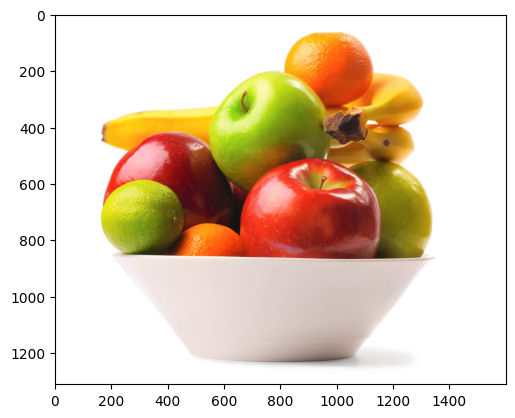

In [3]:
img_np = plt.imread('/content/bowl-of-fruit.jpg')
plt.imshow(img_np)
print("Image shape:", img_np.shape)

In [4]:
img_np = img_np.astype(np.float32) / 255.0

img_torch = torch.tensor(img_np)

img_torch = img_torch.permute(2, 0, 1)

img_torch = img_torch.unsqueeze(0)

print("Torch image shape:",img_torch.shape)

img_grey = kornia.color.rgb_to_grayscale(img_torch)

print("Grey torch image shape:",img_grey.shape)

Torch image shape: torch.Size([1, 3, 1312, 1600])
Grey torch image shape: torch.Size([1, 1, 1312, 1600])


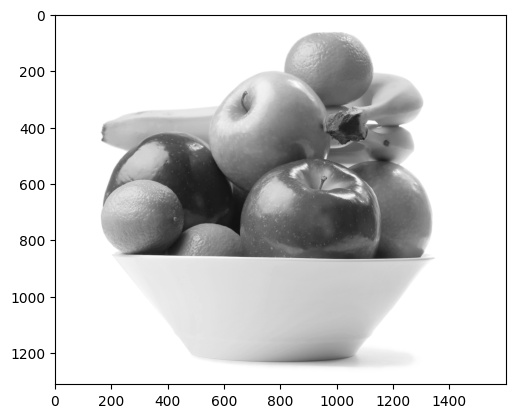

In [5]:
plt.imshow(img_grey.squeeze().numpy(), cmap='gray')
plt.show()

In [6]:
def MyCanny(img, sigma, tau):

  H, W = img.shape[-2:]

  # Step 1) Filtering image with x and y derivatives of Gaussian
  img_gaus = kornia.filters.gaussian_blur2d(img, (5, 5), (sigma, sigma))

  # Sobel Kernals
  sobel_x = torch.tensor([[1, 0, -1],[2, 0, -2],[1, 0, -1]], dtype=torch.float32)
  sobel_y = torch.tensor([[1, 2, 1],[0, 0, 0],[-1, -2, -1]], dtype=torch.float32)

  # x and y gradients
  grad_x = torch.zeros((H, W))
  grad_y = torch.zeros((H, W))

  # Doing convolution for gradient x and gradient y
  for y in range(1, H-1):
      for x in range(1, W-1):
          patch = img_gaus[0, 0, y-1:y+2, x-1:x+2]
          grad_x[y, x] = torch.sum(patch * sobel_x)
          grad_y[y, x] = torch.sum(patch * sobel_y)


  # Step 2) Finding the magnitude and direction of gradient
  img_grad_mag = torch.sqrt(grad_x**2 + grad_y**2)
  img_grad_or = torch.atan2(grad_y, grad_x)


  # Step 3) Implementing non-Maximum Suppression
  supp_img = torch.zeros(img_grad_mag.shape)

  # Checking the direction of the gradient and comparing the neighbors
  for y in range(1, H-1):
      for x in range(1, W-1):
          angle = img_grad_or[y, x] * 180 / torch.pi
          if (angle < 0):
              angle += 180
          # Horizontal edges
          if (0 <= angle < 22.5):
              next_pixel = img_grad_mag[y, x+1]
              prev_pixel = img_grad_mag[y, x-1]

          # Diagonal edges
          elif (22.5 <= angle < 67.5):
              next_pixel = img_grad_mag[y+1, x-1]
              prev_pixel = img_grad_mag[y-1, x+1]

          # Vertical edges
          elif (67.5 <= angle < 112.5):
              next_pixel = img_grad_mag[y+1, x]
              prev_pixel = img_grad_mag[y-1, x]

          # Diagonal edges
          elif (112.5 <= angle < 157.5):
              next_pixel = img_grad_mag[y-1, x-1]
              prev_pixel = img_grad_mag[y+1, x+1]

          # Horizontal edges
          elif (157.5 <= angle <= 180):
              next_pixel = img_grad_mag[y, x+1]
              prev_pixel = img_grad_mag[y, x-1]

          # Keeping the greater magintude pixel in the neighbourhood
          if (img_grad_mag[y, x] >= next_pixel) and (img_grad_mag[y, x] >= prev_pixel):
              supp_img[y, x] = img_grad_mag[y, x]

          # Suppressing the pixel
          else:
              supp_img[y, x] = 0


  # Step 4) Applying the threshold
  result_img = (supp_img >= tau).float()

  result = result_img.unsqueeze(0).unsqueeze(0)

  return result

Testing the function on the image of a bowl of fruits

In [7]:
sigma = 3.0
tau = 0.1

result_img = MyCanny(img_grey, sigma, tau)

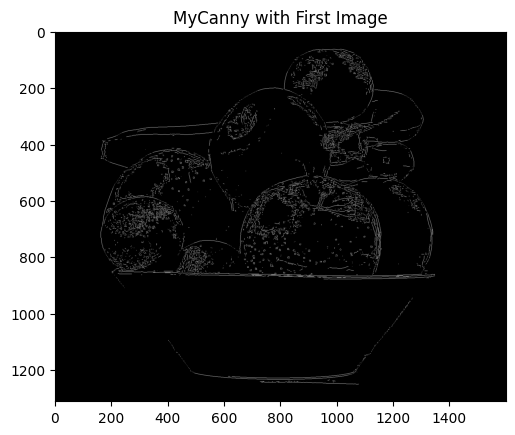

In [8]:
result_img_np = kornia.utils.tensor_to_image(result_img)

result_img_np = (result_img_np * 255.0).astype(np.uint8)

plt.imshow(result_img_np, cmap='gray')
plt.title("MyCanny with First Image")
plt.show()

Testing the function on the image of a carton box

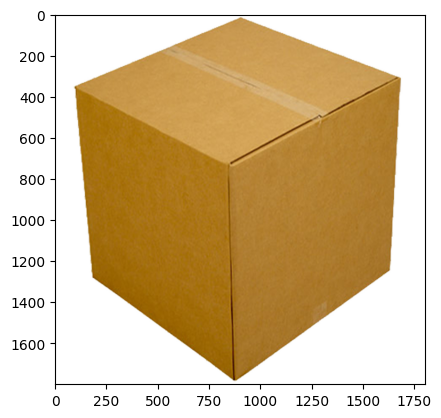

In [9]:
img_np2 = plt.imread('/content/carton-box.jpg')
plt.imshow(img_np2)

img_np2 = img_np2.astype(np.float32) / 255.0

img_torch2 = torch.tensor(img_np2)
img_torch2 = img_torch2.permute(2, 0, 1)
img_torch2 = img_torch2.unsqueeze(0)

img_grey2 = kornia.color.rgb_to_grayscale(img_torch2)

In [10]:
sigma = 3.0
tau = 0.1

result_img2 = MyCanny(img_grey2, sigma, tau)

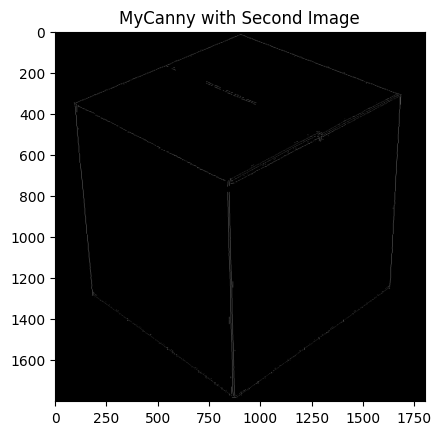

In [11]:
result_img2_np = kornia.utils.tensor_to_image(result_img2)

result_img2_np = (result_img2_np * 255.0).astype(np.uint8)

plt.imshow(result_img2_np, cmap='gray')
plt.title("MyCanny with Second Image")
plt.show()